# Exploratory analysis

In [4]:
# imports
import utils

import requests
import json
import pandas as pd
import numpy as np

# umap embeddigns
import umap.umap_ as umap

# data plots
import datamapplot
import matplotlib.pyplot as plt


c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alba.garcia.romo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# building the snapshot data

# filters
univ_id = "https://openalex.org/i9617848"  # UPC
publication_year = "2024"

# Build the API URL with combined filters:
# - Filter by institution using authorships.institutions.id
# - Filter by publication year

url = (
    f"https://api.openalex.org/works?"
    f"filter=authorships.institutions.id:{univ_id},"
    f"publication_year:{publication_year}"
    f"&per_page=200"
)

response = requests.get(url)
data = response.json()
#print(data)

# Count the total number
work_count = data['meta']['count']
print(work_count)


# SAVE all pages
total_works = data['meta']['count']
print(f"Total works available: {total_works}")

# Fetch all the pages
# Calculate the number of pages needed
per_page = 200
num_pages = (total_works // per_page) + (1 if total_works % per_page > 0 else 0)

works = []
# Loop over all pages and extend the works list
for page in range(1, num_pages + 1):
    page_url = (
        f"https://api.openalex.org/works?"
        f"filter=authorships.institutions.id:{univ_id},"
        f"publication_year:{publication_year}"
        f"&per_page={per_page}&page={page}"
    )
    # print(f"Fetching page {page}...")
    response = requests.get(page_url)
    page_data = response.json()
    works.extend(page_data.get("results", []))

# Create a combined dictionary with meta info and the aggregated results
output_data = {
    "meta": {
        "total_works": total_works,
        "num_pages": num_pages,
        "per_page": per_page,
    },
    "results": works
}

# Save the combined data into a JSON file
with open("works_UPC_2024_all.json", "w") as json_file:
    json.dump(output_data, json_file, indent=4)

3415
Total works available: 3415


## UAB

In [5]:
df_uab = utils.build_df("works_UAB_2024_all.json")

                                           Work Name  Publication Year  \
0  A Phase 3, Randomized, Controlled Trial of Res...              2024   
1  Diagnostic Accuracy of a Plasma Phosphorylated...              2024   

                                             Authors  \
0  Stephen A. Harrison, Pierre Bédossa, Cynthia D...   
1  Nicholas J. Ashton, Wagner S. Brum, Guglielmo ...   

                                Primary Topic                      Subfield  \
0       Liver Disease Diagnosis and Treatment                  Epidemiology   
1  Dementia and Cognitive Impairment Research  Psychiatry and Mental health   

      Field           Domain  \
0  Medicine  Health Sciences   
1  Medicine  Health Sciences   

                                            Abstract  
0  Nonalcoholic steatohepatitis (NASH) is a progr...  
1  Importance Phosphorylated tau (p-tau) is a spe...  
5617


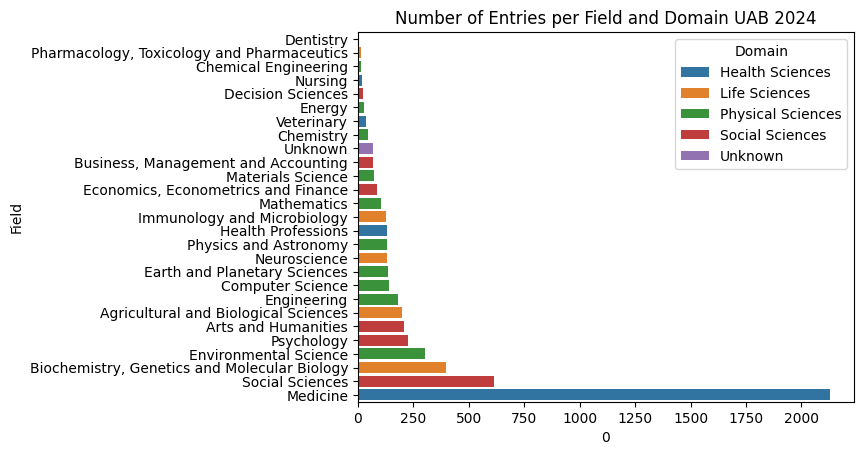

In [6]:
counts_uab = df_uab.groupby(["Domain","Field"]).size().sort_values().to_frame().reset_index()
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(counts_uab, x=0, y="Field", hue="Domain", orient="h")
# Add title
plt.title("Number of Entries per Field and Domain UAB 2024")
plt.show()

## UB

                                           Work Name  Publication Year  \
0                         Review of Particle Physics              2024   
1  A biological definition of neuronal α-synuclei...              2024   

                                             Authors  \
0  S. Navas, C. Amsler, Th. Gutsche, C. Hanhart, ...   
1  Tanya Simuni, Lana M. Chahine, Kathleen L. Pos...   

                                   Primary Topic  \
0               Dark Matter and Cosmic Phenomena   
1  Parkinson's Disease Mechanisms and Treatments   

                          Subfield                  Field             Domain  \
0  Nuclear and High Energy Physics  Physics and Astronomy  Physical Sciences   
1                        Neurology               Medicine    Health Sciences   

                                            Abstract  
0  The summarizes much of particle physics and co...  
1                                        no abstract  
7878


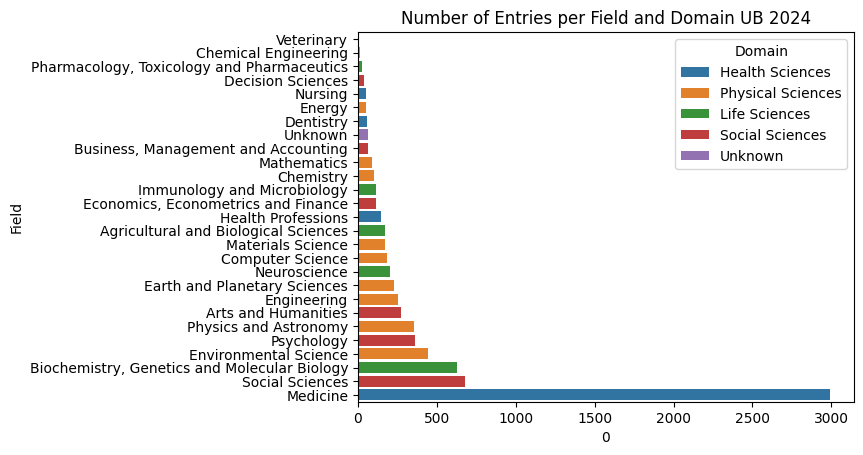

In [7]:
df_ub = utils.build_df("works_UB_2024_all.json")
counts_ub = df_ub.groupby(["Domain","Field"]).size().sort_values().to_frame().reset_index()

sns.barplot(counts_ub, x=0, y="Field", hue="Domain", orient="h")
# Add title
plt.title("Number of Entries per Field and Domain UB 2024")
plt.show()

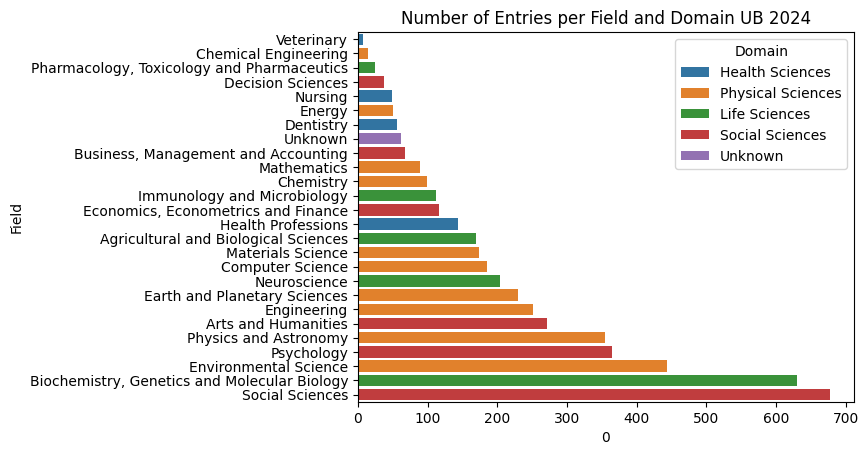

In [11]:
# Filter out 'Medicine'
df_filtered_ub = df_ub[df_ub["Field"] != "Medicine"]
counts_ub = df_filtered_ub.groupby(["Domain","Field"]).size().sort_values().to_frame().reset_index()

sns.barplot(counts_ub, x=0, y="Field", hue="Domain", orient="h")
# Add title
plt.title("Number of Entries per Field and Domain UB 2024")
plt.show()

## Montpellier

                                           Work Name  Publication Year  \
0  Sustained human outbreak of a new MPXV clade I...              2024   
1  Neurofilaments as biomarkers in neurological d...              2024   

                                             Authors  \
0  Emmanuel Hasivirwe Vakaniaki, Cris Kacita, Edd...   
1  Michael Khalil, Charlotte E. Teunissen, Sylvai...   

                            Primary Topic   Subfield  \
0         Poxvirus research and outbreaks   Virology   
1  Amyotrophic Lateral Sclerosis Research  Neurology   

                         Field           Domain  \
0  Immunology and Microbiology    Life Sciences   
1                     Medicine  Health Sciences   

                                            Abstract  
0  Outbreaks of monkeypox (mpox) have historicall...  
1                                        no abstract  
6336


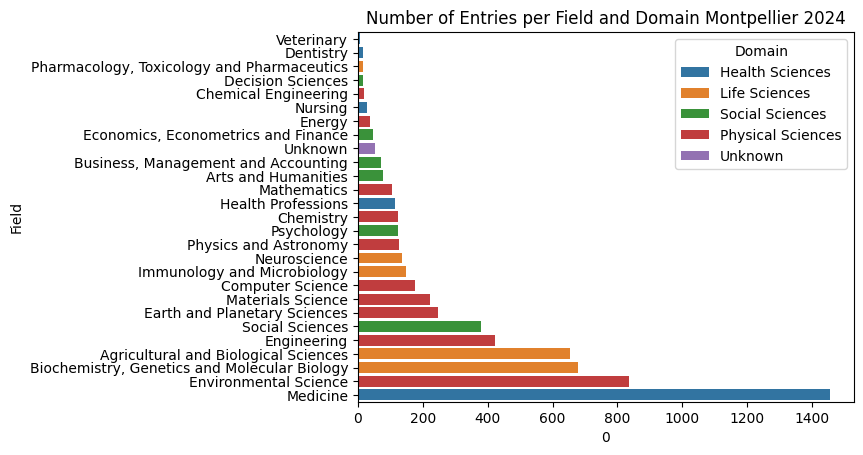

In [8]:
df_montpellier = utils.build_df("works_Montpellier_2024_all.json")
utils.plot_works_by_fields(df_montpellier, "Montpellier 2024")

## Utrecht

                                           Work Name  Publication Year  \
0  Minimal information for studies of extracellul...              2024   
1  TRIPOD+AI statement: updated guidance for repo...              2024   

                                             Authors  \
0  Joshua A Welsh, Deborah C. I. Goberdhan, Lorra...   
1  Gary S. Collins, Karel G.M. Moons, Paula Dhima...   

                                       Primary Topic            Subfield  \
0                  Extracellular vesicles in disease   Molecular Biology   
1  Artificial Intelligence in Healthcare and Educ...  Health Informatics   

                                          Field           Domain  \
0  Biochemistry, Genetics and Molecular Biology    Life Sciences   
1                                      Medicine  Health Sciences   

                                            Abstract  
0  Extracellular vesicles (EVs), through their co...  
1  The TRIPOD (Transparent Reporting of a multiva...  
7271


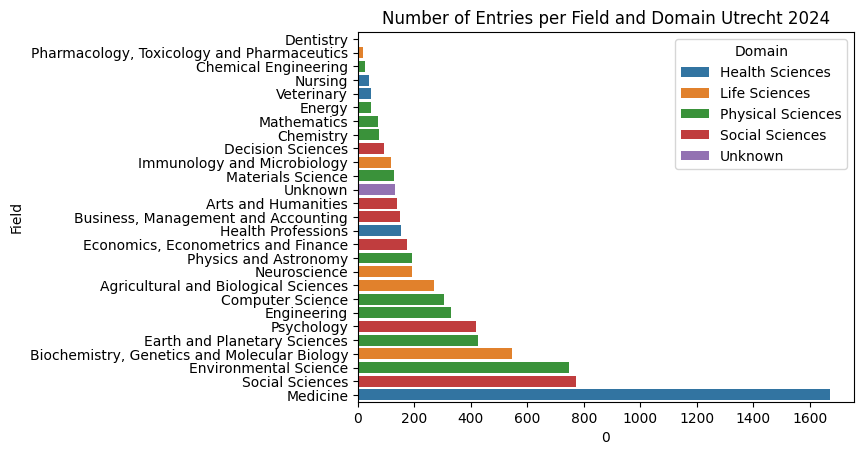

In [9]:
df_utrecht = utils.build_df("works_Utrecht_2024_all.json")
utils.plot_works_by_fields(df_utrecht, "Utrecht 2024")

## UPC

                                           Work Name  Publication Year  \
0  The Galaxy platform for accessible, reproducib...              2024   
1  The 2024 report of the Lancet Countdown on hea...              2024   

                                             Authors  \
0  Linelle Ann L Abueg, Enis Afgan, Olivier Allar...   
1  Marina Romanello, Maria Walawender, Shih-Che H...   

                              Primary Topic  \
0  Scientific Computing and Data Management   
1         Climate Change and Health Impacts   

                             Subfield                  Field  \
0  Information Systems and Management      Decision Sciences   
1  Health, Toxicology and Mutagenesis  Environmental Science   

              Domain                                           Abstract  
0    Social Sciences  Abstract Galaxy (https://galaxyproject.org) is...  
1  Physical Sciences                                        no abstract  
3415


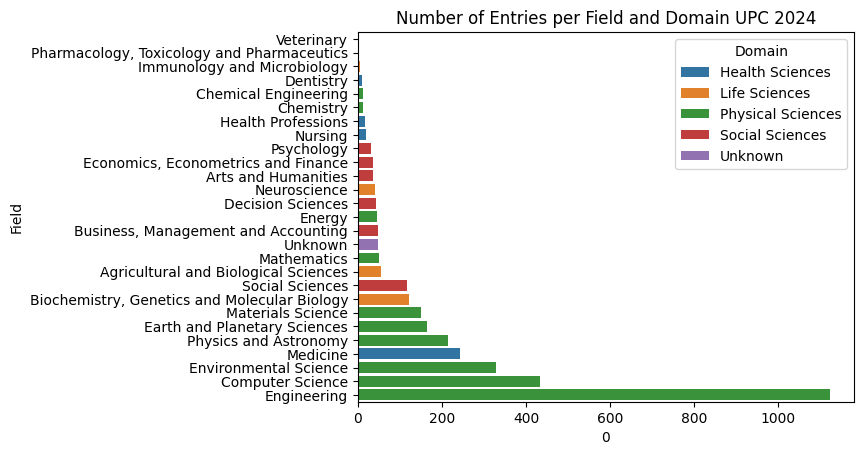

In [10]:
df_upc = utils.build_df("works_UPC_2024_all.json")
utils.plot_works_by_fields(df_upc, "UPC 2024")

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot_works_by_fields(dfs, labels, cols=2):
    """
    Plot separate bar charts for each DataFrame in a grid layout.

    Parameters:
    - dfs: List of DataFrames.
    - labels: List of strings (titles for each chart).
    - cols: Number of columns in the grid layout.
    """
    n = len(dfs)
    rows = math.ceil(n / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6), squeeze=False)
    axes = axes.flatten()  # Flatten in case of single row

    for i, (df, label) in enumerate(zip(dfs, labels)):
        counts = (
            df.groupby(["Domain", "Field"])
            .size()
            .sort_values()
            .to_frame(name="Count")
            .reset_index()
        )

        sns.barplot(data=counts, x="Count", y="Field", hue="Domain", orient="h", ax=axes[i])
        axes[i].set_title(f"{label}")
    
    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle("Number of Entries per Field and Domain", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


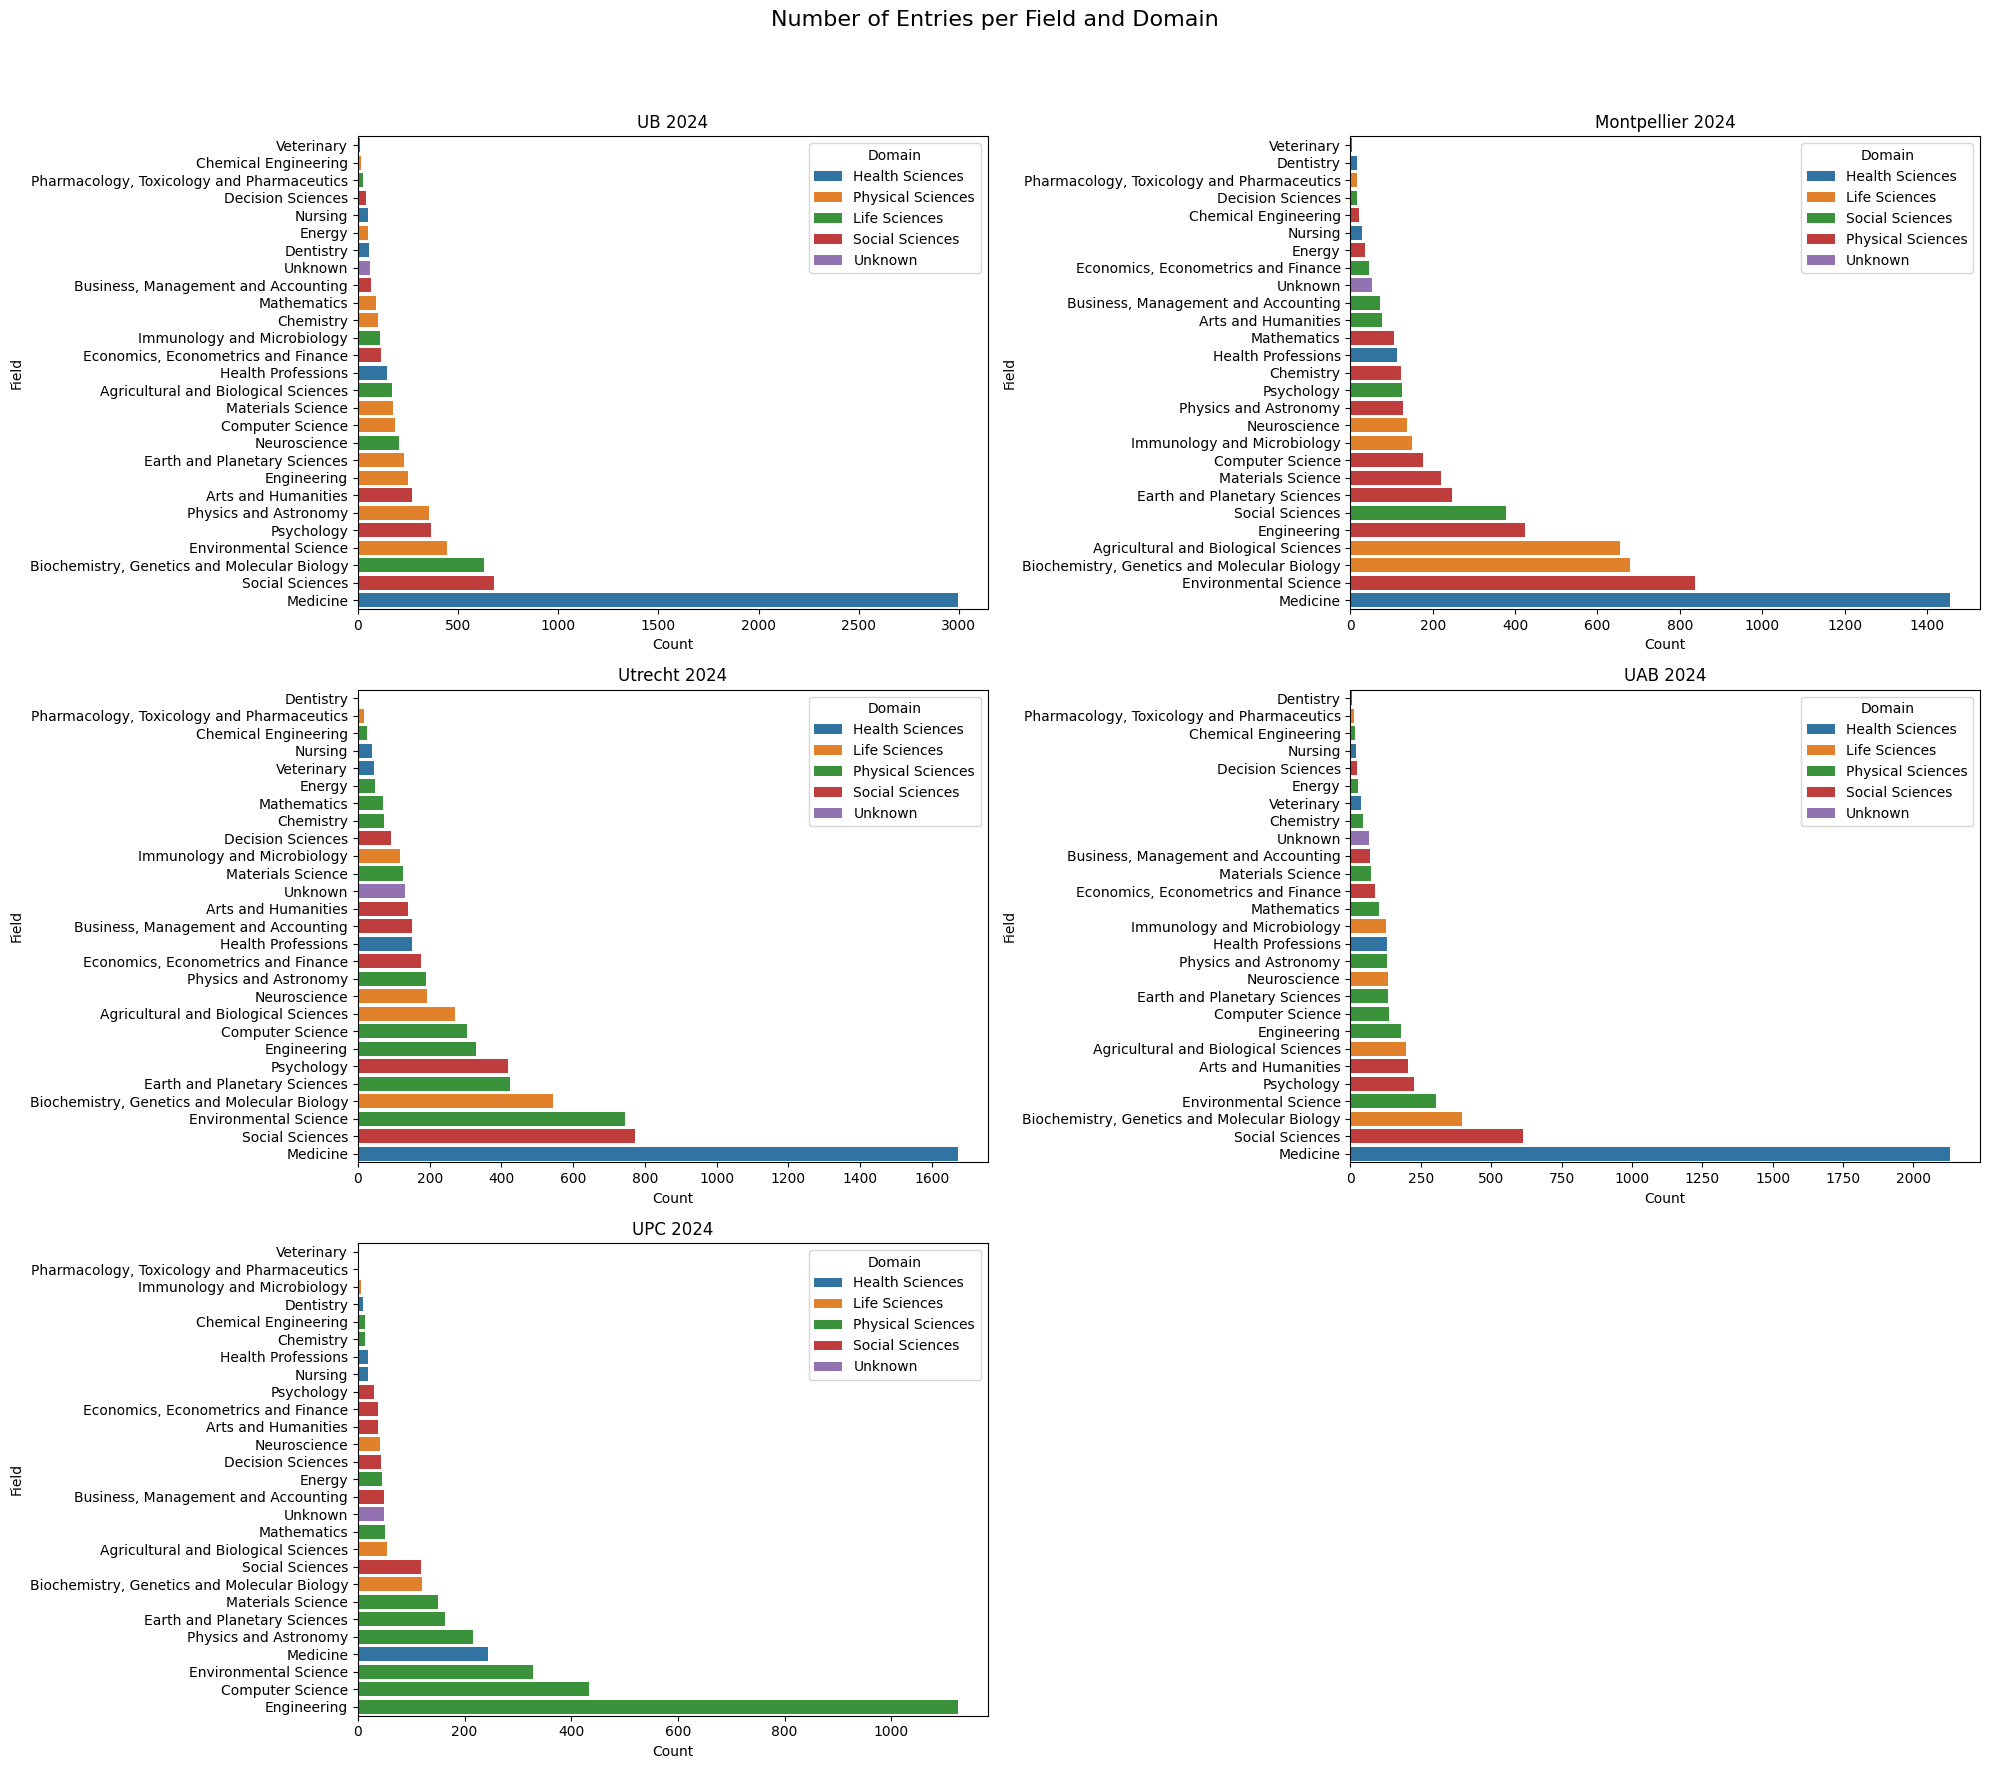

In [20]:
dfs = [df_ub, df_montpellier, df_utrecht, df_uab, df_upc]
labels = ["UB 2024", "Montpellier 2024", "Utrecht 2024", "UAB 2024", "UPC 2024"]
plot_works_by_fields(dfs, labels)

## Scores

In [1]:
import utils

c:\Users\alba.garcia.romo\OneDrive - Accenture\Desktop\alba\TFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alba.garcia.romo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
df_ub_with_topics = pd.read_parquet("01. data\df_works_UB_2024_with_topics.parquet")
print(df_ub_with_topics)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\alba.garcia.romo\AppData\Local\Temp\ipykernel_27512\2769730949.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_ub_with_topics = pd.read_parquet("01. data\df_works_UB_2024_with_topics.parquet")


                                              Work Name  Publication Year  \
0                            Review of Particle Physics              2024   
1     A biological definition of neuronal α-synuclei...              2024   
2     GWTC-2.1: Deep extended catalog of compact bin...              2024   
3         Robustness and resilience of complex networks              2024   
4         The search for neutrinoless double-beta decay              2024   
...                                                 ...               ...   
7873  Inkjet Printed Perovskite LEDs: Approaches, Li...              2024   
7874  Inkjet-printed FASnI3 photodetectors for flexi...              2024   
7875  Effect of annealing temperature on the propert...              2024   
7876  Nickel-manganese based anodes for efficient el...              2024   
7877  OR30-01 Brown Adipose Tissue as an Endocrine O...              2024   

                                                Authors  \
0     S. Navas, 

In [3]:
df_ub_with_topics[['Score 1', 'Score 2', 'Score 3']].describe()

,Score 1,Score 2,Score 3
count,7878.000000,7878.000000,7878.000000
mean,0.964584,0.894492,0.839372
std,0.134016,0.275550,0.337461
min,0.000000,0.000000,0.000000
25%,0.993500,0.970350,0.948000
50%,0.999300,0.992900,0.985000
75%,0.999900,0.998100,0.995100
max,1.000000,1.000000,0.999900


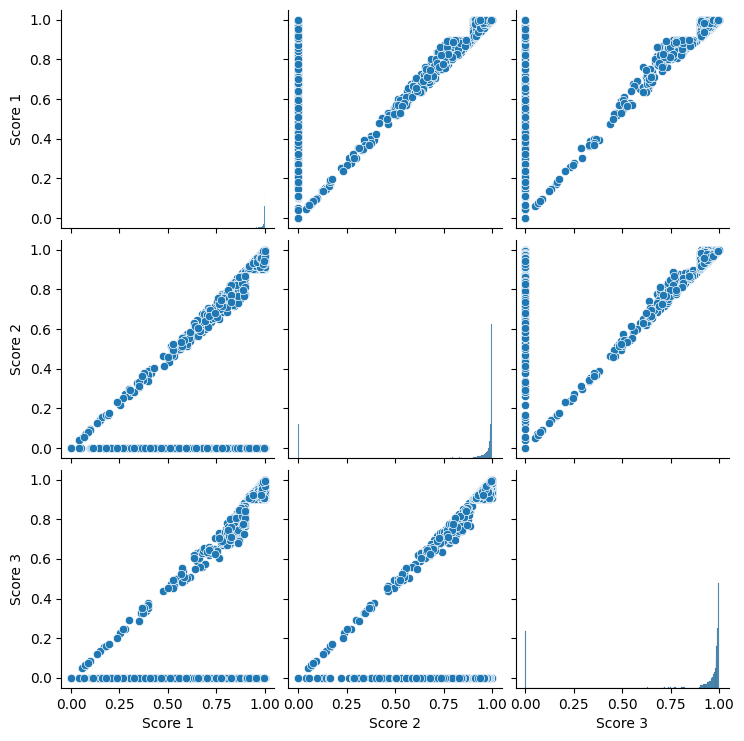

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_ub_with_topics[['Score 1', 'Score 2', 'Score 3']])
plt.show()


In [7]:
(df_ub_with_topics[['Score 1', 'Score 2', 'Score 3']] == 0).sum()


Score 1      62
Score 2     628
Score 3    1062
dtype: int64

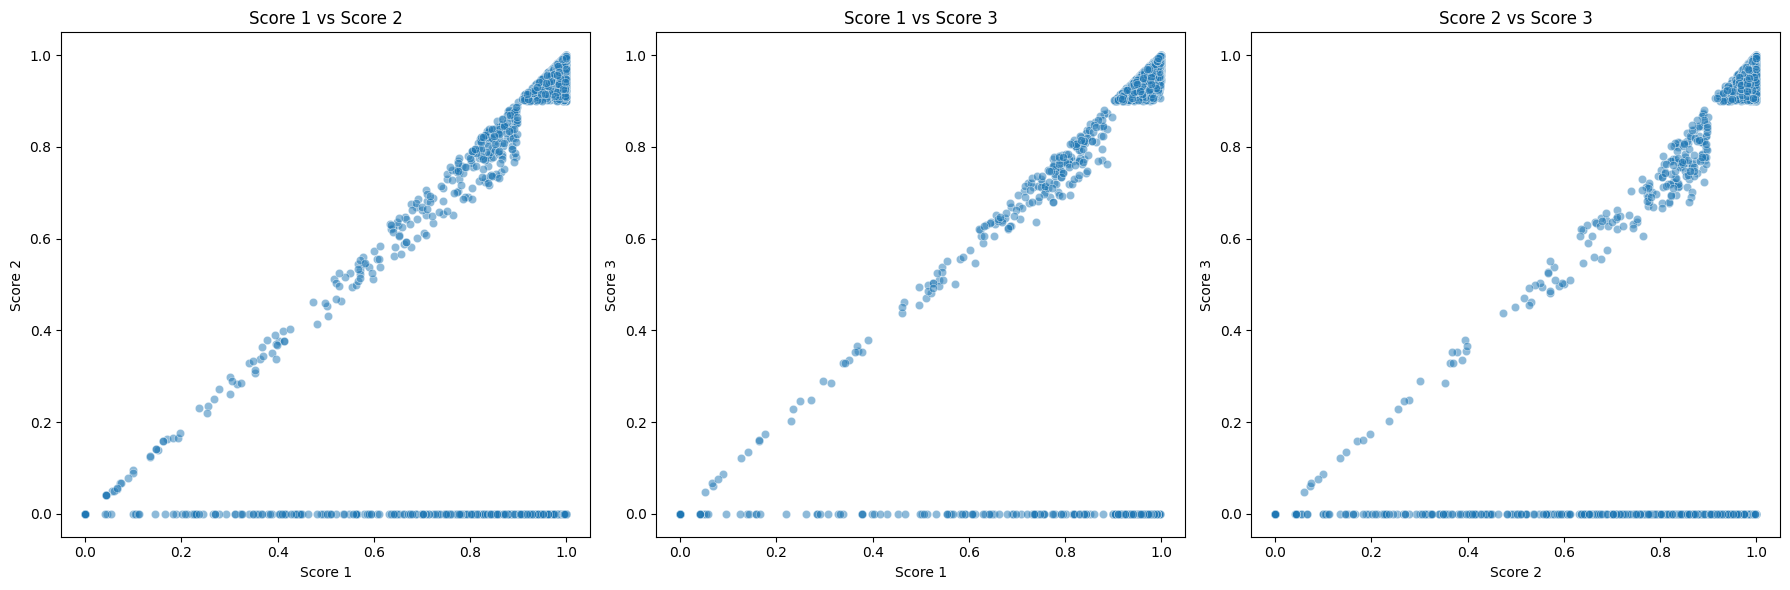

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Score 1 vs Score 2
sns.scatterplot(ax=axes[0], data=df_ub_with_topics, x='Score 1', y='Score 2', alpha=0.5)
axes[0].set_title('Score 1 vs Score 2')
axes[0].set_xlabel('Score 1')
axes[0].set_ylabel('Score 2')


# Score 1 vs Score 3
sns.scatterplot(ax=axes[2], data=df_ub_with_topics, x='Score 1', y='Score 3', alpha=0.5)
axes[1].set_title('Score 1 vs Score 3')
axes[1].set_xlabel('Score 1')
axes[1].set_ylabel('Score 3')

# Score 2 vs Score 3
sns.scatterplot(ax=axes[1], data=df_ub_with_topics, x='Score 2', y='Score 3', alpha=0.5)
axes[2].set_title('Score 2 vs Score 3')
axes[2].set_xlabel('Score 2')
axes[2].set_ylabel('Score 3')

plt.tight_layout()
plt.show()


In [19]:
df_nonzero = df_ub_with_topics[(df_ub_with_topics['Score 1'] > 0) 
                               & (df_ub_with_topics['Score 2'] > 0) 
                               & (df_ub_with_topics['Score 3'] > 0)]


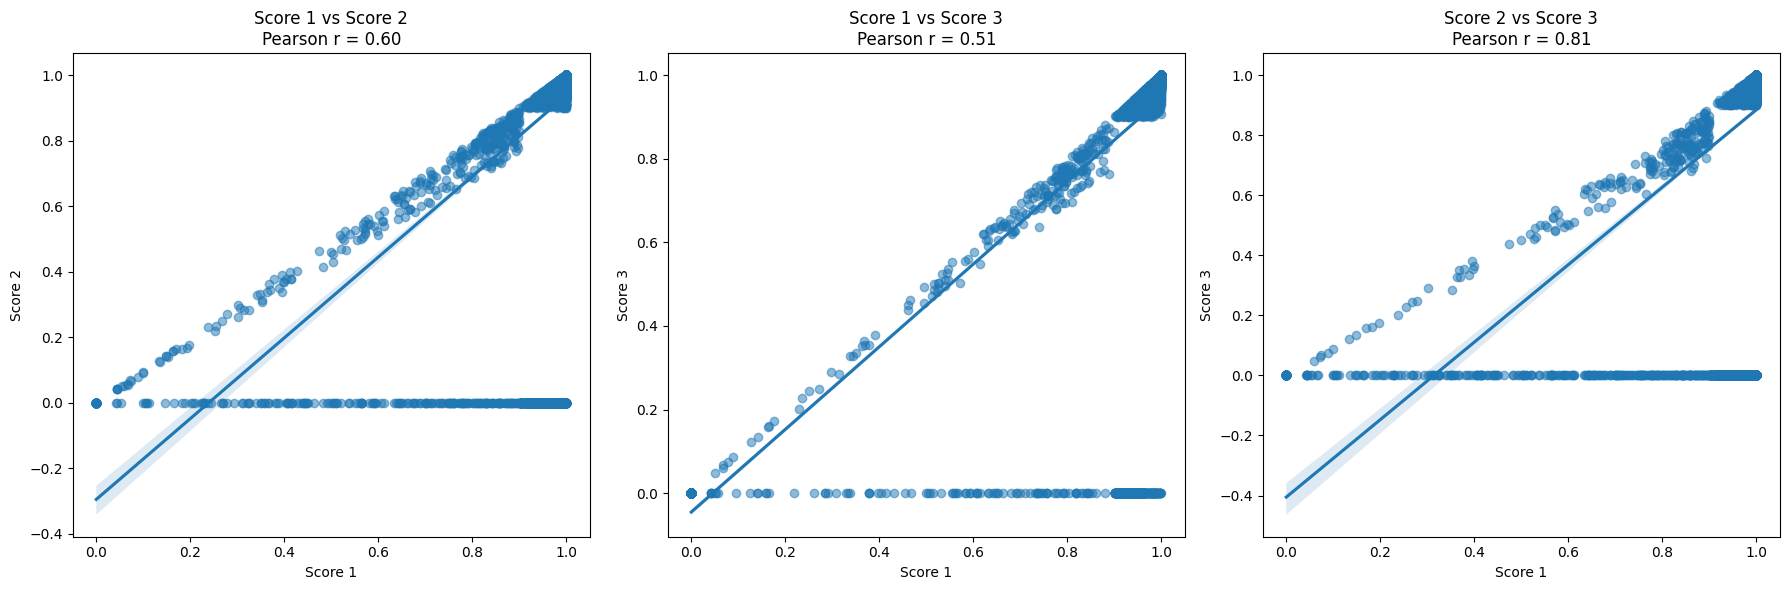

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Score 1 vs Score 2
sns.regplot(ax=axes[0], data=df_ub_with_topics, x='Score 1', y='Score 2', scatter_kws={'alpha': 0.5})
corr1, _ = pearsonr(df_ub_with_topics['Score 1'], df_ub_with_topics['Score 2'])
axes[0].set_title(f'Score 1 vs Score 2\nPearson r = {corr1:.2f}')
axes[0].set_xlabel('Score 1')
axes[0].set_ylabel('Score 2')

# Score 2 vs Score 3
sns.regplot(ax=axes[1], data=df_ub_with_topics, x='Score 2', y='Score 3', scatter_kws={'alpha': 0.5})
corr2, _ = pearsonr(df_ub_with_topics['Score 2'], df_ub_with_topics['Score 3'])
axes[2].set_title(f'Score 2 vs Score 3\nPearson r = {corr2:.2f}')
axes[2].set_xlabel('Score 2')
axes[2].set_ylabel('Score 3')

# Score 1 vs Score 3
sns.regplot(ax=axes[2], data=df_ub_with_topics, x='Score 1', y='Score 3', scatter_kws={'alpha': 0.5})
corr3, _ = pearsonr(df_ub_with_topics['Score 1'], df_ub_with_topics['Score 3'])
axes[1].set_title(f'Score 1 vs Score 3\nPearson r = {corr3:.2f}')
axes[1].set_xlabel('Score 1')
axes[1].set_ylabel('Score 3')

plt.tight_layout()
plt.show()


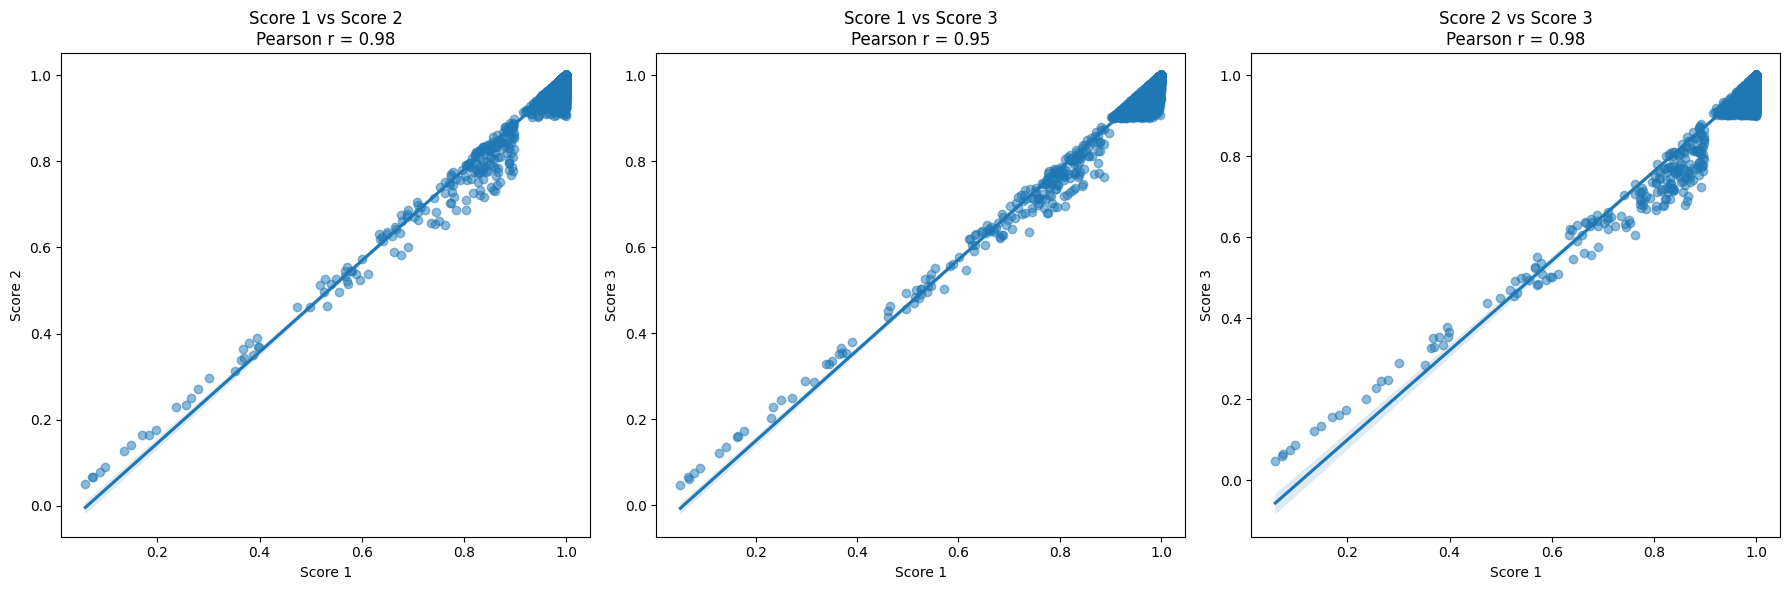

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Score 1 vs Score 2
sns.regplot(ax=axes[0], data=df_nonzero, x='Score 1', y='Score 2', scatter_kws={'alpha': 0.5})
corr1, _ = pearsonr(df_nonzero['Score 1'], df_nonzero['Score 2'])
axes[0].set_title(f'Score 1 vs Score 2\nPearson r = {corr1:.2f}')
axes[0].set_xlabel('Score 1')
axes[0].set_ylabel('Score 2')

# Score 2 vs Score 3
sns.regplot(ax=axes[1], data=df_nonzero, x='Score 2', y='Score 3', scatter_kws={'alpha': 0.5})
corr2, _ = pearsonr(df_nonzero['Score 2'], df_nonzero['Score 3'])
axes[2].set_title(f'Score 2 vs Score 3\nPearson r = {corr2:.2f}')
axes[2].set_xlabel('Score 2')
axes[2].set_ylabel('Score 3')

# Score 1 vs Score 3
sns.regplot(ax=axes[2], data=df_nonzero, x='Score 1', y='Score 3', scatter_kws={'alpha': 0.5})
corr3, _ = pearsonr(df_nonzero['Score 1'], df_nonzero['Score 3'])
axes[1].set_title(f'Score 1 vs Score 3\nPearson r = {corr3:.2f}')
axes[1].set_xlabel('Score 1')
axes[1].set_ylabel('Score 3')

plt.tight_layout()
plt.show()

<Axes: xlabel='score', ylabel='Density'>

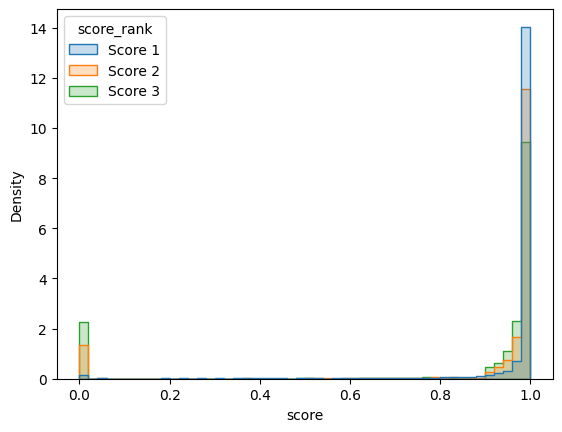

In [5]:
df_long = df_ub_with_topics.melt(value_vars=['Score 1', 'Score 2', 'Score 3'], var_name='score_rank', value_name='score')
sns.histplot(data=df_long, x='score', hue='score_rank', bins=50, element='step', stat='density')


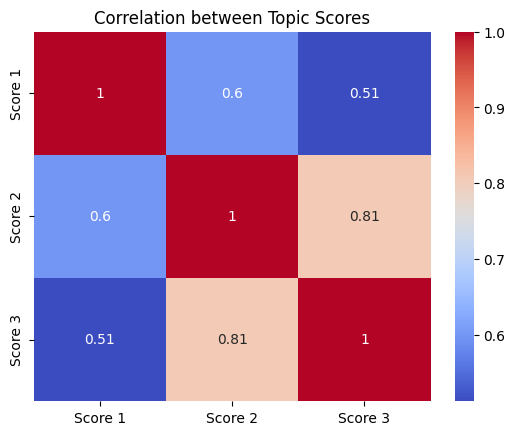

In [24]:
corr_matrix = df_ub_with_topics[['Score 1', 'Score 2', 'Score 3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Topic Scores')
plt.show()


In [25]:
# utrecht data

df_utrecht = pd.read_parquet("df_works_Utrecht_2024_with_topics.parquet")
print(df_utrecht)

                                              Work Name  Publication Year  \
0     Minimal information for studies of extracellul...              2024   
1     TRIPOD+AI statement: updated guidance for repo...              2024   
2            Maslach Burnout Inventory – General Survey              2024   
3     Maddison‐style estimates of the evolution of t...              2024   
4      Critical transitions in the Amazon forest system              2024   
...                                                 ...               ...   
7266  Postsecular Italy: Transnational and Interdisc...              2024   
7267                             Aan alle goede dingen…              2024   
7268               Love and the natural order of things              2024   
7269  Open uitnodiging om oudere, moderne en contemp...              2024   
7270                      Een terugblik op de MVN-reeks              2024   

                                                Authors  \
0     Joshua A W

In [26]:
df_nonzero_utrecht = df_utrecht[(df_utrecht['Score 1'] > 0) 
                               & (df_utrecht['Score 2'] > 0) 
                               & (df_utrecht['Score 3'] > 0)]


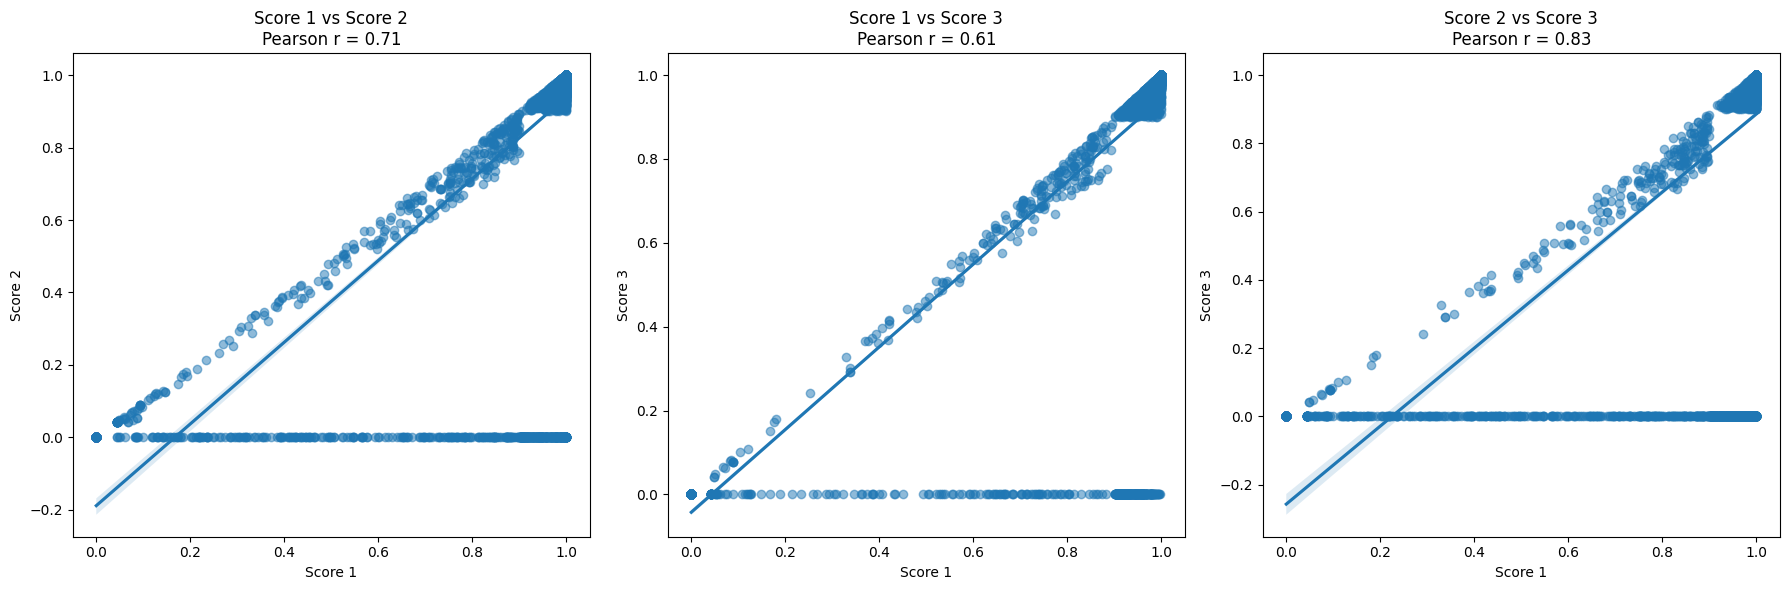

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Score 1 vs Score 2
sns.regplot(ax=axes[0], data=df_utrecht, x='Score 1', y='Score 2', scatter_kws={'alpha': 0.5})
corr1, _ = pearsonr(df_utrecht['Score 1'], df_utrecht['Score 2'])
axes[0].set_title(f'Score 1 vs Score 2\nPearson r = {corr1:.2f}')
axes[0].set_xlabel('Score 1')
axes[0].set_ylabel('Score 2')

# Score 2 vs Score 3
sns.regplot(ax=axes[1], data=df_utrecht, x='Score 2', y='Score 3', scatter_kws={'alpha': 0.5})
corr2, _ = pearsonr(df_utrecht['Score 2'], df_utrecht['Score 3'])
axes[2].set_title(f'Score 2 vs Score 3\nPearson r = {corr2:.2f}')
axes[2].set_xlabel('Score 2')
axes[2].set_ylabel('Score 3')

# Score 1 vs Score 3
sns.regplot(ax=axes[2], data=df_utrecht, x='Score 1', y='Score 3', scatter_kws={'alpha': 0.5})
corr3, _ = pearsonr(df_utrecht['Score 1'], df_utrecht['Score 3'])
axes[1].set_title(f'Score 1 vs Score 3\nPearson r = {corr3:.2f}')
axes[1].set_xlabel('Score 1')
axes[1].set_ylabel('Score 3')

plt.tight_layout()
plt.show()